In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/output.csv')

In [ ]:
df.describe()

,Predicted_Class,Feature_22,Feature_56,Feature_69,Feature_102,Feature_401,Feature_750,Feature_781,Feature_823,Feature_878,...,Feature_1335,Feature_1341,Feature_1410,Feature_1479,Feature_1596,Feature_1597,Feature_1599,Feature_1738,lum,Y_Label
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,...,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,4.461538,0.258189,290.537898,1.081933,6.023036,1.137498,1.616660,0.075505,1.416166,0.623636,...,1.358614,1.000538,0.032768,585.957173,14.783561,0.035620,26.690028,0.089721,45.091823,-0.335469
std,1.956601,1.898143,1313.237913,4.481433,13.747985,5.425827,6.217538,0.619560,6.799742,2.802664,...,3.564073,6.936090,0.262249,1746.068634,24.839508,0.288630,37.657436,0.582963,11.791725,0.085466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.696515,-0.882000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.554656,-0.335469
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.766258,0.000000,44.399056,-0.335469
75%,7.000000,0.000000,0.000000,0.000000,2.805982,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,22.612581,0.000000,44.634642,0.000000,53.548223,-0.335469
max,9.000000,22.989107,13258.975000,40.768215,100.064450,50.669228,58.837770,8.174302,74.214874,27.555414,...,26.899849,116.023155,3.759387,12429.187000,161.267040,4.422004,199.366260,7.333979,82.541527,1.095000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Image_Name       819 non-null    object 
 1   Predicted_Class  819 non-null    int64  
 2   Feature_22       819 non-null    float64
 3   Feature_56       819 non-null    float64
 4   Feature_69       819 non-null    float64
 5   Feature_102      819 non-null    float64
 6   Feature_401      819 non-null    float64
 7   Feature_750      819 non-null    float64
 8   Feature_781      819 non-null    float64
 9   Feature_823      819 non-null    float64
 10  Feature_878      819 non-null    float64
 11  Feature_922      819 non-null    float64
 12  Feature_940      819 non-null    float64
 13  Feature_1101     819 non-null    float64
 14  Feature_1107     819 non-null    float64
 15  Feature_1245     819 non-null    float64
 16  Feature_1335     819 non-null    float64
 17  Feature_1341    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
df = df.drop(columns='Image_Name')

In [ ]:
df.columns

Index(['Predicted_Class', 'Feature_22', 'Feature_56', 'Feature_69',
       'Feature_102', 'Feature_401', 'Feature_750', 'Feature_781',
       'Feature_823', 'Feature_878', 'Feature_922', 'Feature_940',
       'Feature_1101', 'Feature_1107', 'Feature_1245', 'Feature_1335',
       'Feature_1341', 'Feature_1410', 'Feature_1479', 'Feature_1596',
       'Feature_1597', 'Feature_1599', 'Feature_1738', 'lum', 'Y_Label'],
      dtype='object')

In [ ]:
target_column = 'Y_Label'

In [ ]:
X = df.drop(columns=[target_column])
y = df[target_column]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_predict = lr.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error
r2_lr = r2_score(y_test, y_lr_predict)
print(f'R2 Score: {r2_lr}')
mae_lr = mean_absolute_error(y_test, y_lr_predict)
print(f'Mean Absolute Error (MAE): {mae_lr}')

R2 Score: -0.026554175403253444
Mean Absolute Error (MAE): 0.026714005337606442


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
model2 = Ridge()
alphas = [1000000000,100000000000,10000000000000000,1000000000000000000]
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(model2, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print(best_alpha)
rid = Ridge(alpha=best_alpha)
rid.fit(X_train, y_train)
y_rid_predict = rid.predict(X_test)
r2_rid = r2_score(y_test, y_rid_predict)
print(f'R2 Score: {r2_rid}')
mae_rid = mean_absolute_error(y_test, y_rid_predict)
print(f'Mean Absolute Error (MAE): {mae_rid}')

1000000000000000000
R2 Score: -0.013539355444796453
Mean Absolute Error (MAE): 0.019427451278700228


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
y_rfc_predict = rfc.predict(X_test)

r2_rfc = r2_score(y_test, y_rfc_predict)
print(f'R2 Score: {r2_rfc}')
mae_rfc = mean_absolute_error(y_test, y_rfc_predict)
print(f'Mean Absolute Error (MAE): {mae_rfc}')

R2 Score: -0.1360114021136687
Mean Absolute Error (MAE): 0.02664862742658062


In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_svr_predict = svr.predict(X_test)

r2_svr = r2_score(y_test, y_svr_predict)
print(f'R2 Score: {r2_svr}')
mae_svr = mean_absolute_error(y_test, y_svr_predict)
print(f'Mean Absolute Error (MAE): {mae_svr}')

R2 Score: -0.8064965660909129
Mean Absolute Error (MAE): 0.10847469352878071


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

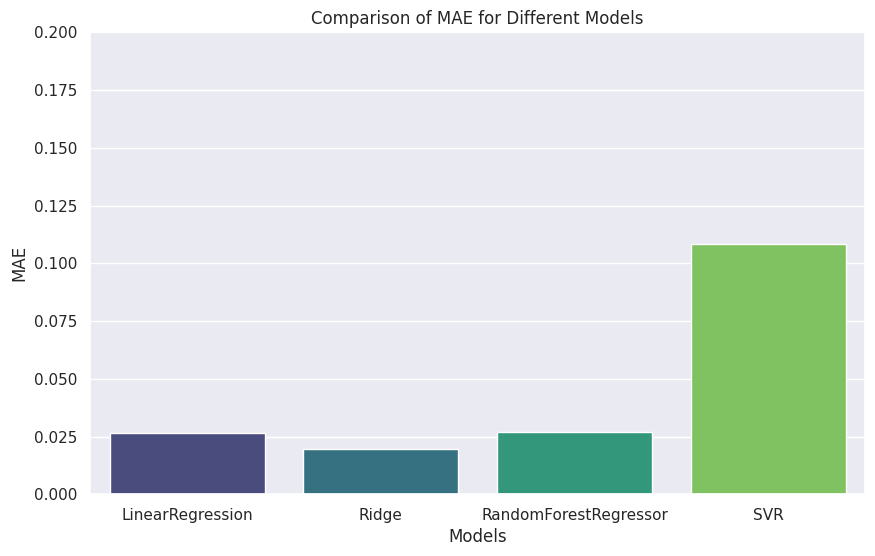

In [ ]:
Model_Names=['LinearRegression','Ridge','RandomForestRegressor','SVR']
MAE = [0.0267,0.0194,0.0271,0.1085]
data = {'Model':Model_Names,'MAE':MAE}
df2 = pd.DataFrame(data)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=df2, palette='viridis')
plt.ylim([0, 0.2])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparison of MAE for Different Models')
plt.show()

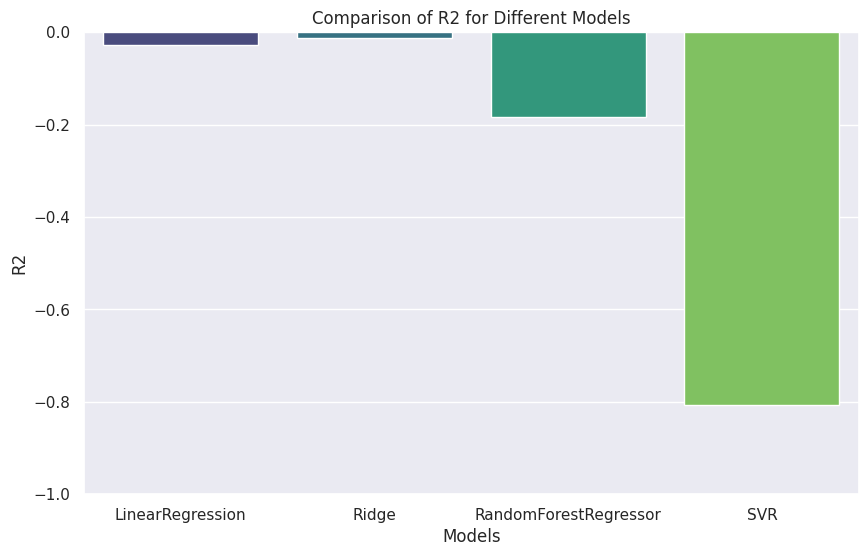

In [ ]:
R2 = [-0.0266,-0.0135,-0.1828,-0.8065]
data = {'Model':Model_Names,'R2':R2}
df3 = pd.DataFrame(data)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', data=df3, palette='viridis')
plt.ylim([-1,0])
plt.xlabel('Models')
plt.ylabel('R2')
plt.title('Comparison of R2 for Different Models')
plt.show()